# US-align demo

US-align is installed and ready to run here.

------

### Print general Usage message for US-align

Running the command without any other options prints out the Usage information.

In [1]:
!USalign


 ********************************************************************
 * US-align (Version 20230609)                                      *
 * Universal Structure Alignment of Proteins and Nucleic Acids      *
 * Reference: C Zhang, M Shine, AM Pyle, Y Zhang. (2022) Nat Methods*
 * Please email comments and suggestions to zhang@zhanggroup.org    *
 ********************************************************************

Usage: USalign PDB1.pdb PDB2.pdb [Options]

Options:
    -mol  Type of molecule(s) to align.
          auto: (default) align both protein and nucleic acids.
          prot: only align proteins in a structure.
          RNA : only align RNA and DNA in a structure.

     -mm  Multimeric alignment option:
          0: (default) alignment of two monomeric structures
          1: alignment of two multi-chain oligomeric structures
          2: alignment of individual chains to an oligomeric structure
             $ USalign -dir1 monomers/ list oligomer.pdb -ter 0 -mm 2
        

-------


### Demonstrate Structural Alignment using US-align

To do this we'll use the basic command the Usage suggests. The package comes with those two referenced PDB files. They can be seen in [the Us-align software repository](https://github.com/pylelab/USalign). They have been moved to the 'root' directory here to make using the basic command easy.

In [2]:
!USalign PDB1.pdb PDB2.pdb


 ********************************************************************
 * US-align (Version 20230609)                                      *
 * Universal Structure Alignment of Proteins and Nucleic Acids      *
 * Reference: C Zhang, M Shine, AM Pyle, Y Zhang. (2022) Nat Methods*
 * Please email comments and suggestions to zhang@zhanggroup.org    *
 ********************************************************************

Name of Structure_1: PDB1.pdb:_ (to be superimposed onto Structure_2)
Name of Structure_2: PDB2.pdb:A
Length of Structure_1: 250 residues
Length of Structure_2: 166 residues

Aligned length= 119, RMSD=   2.20, Seq_ID=n_identical/n_aligned= 0.824
TM-score= 0.42654 (normalized by length of Structure_1: L=250, d0=5.85)
TM-score= 0.61629 (normalized by length of Structure_2: L=166, d0=4.80)
(You should use TM-score normalized by length of the reference structure)

(":" denotes residue pairs of d < 5.0 Angstrom, "." denotes other aligned residues)
CQDVVQDVPNVDVQMLELYDRMSFKDIDG

This will also work in terminals opened from this session. Here would be the command equivalent for there:
    
```shell
USalign PDB1.pdb PDB2.pdb
```

------


### Advanced Use #1 from the Usage info: generate an image for a pair of superposed structures

The penultimate listing among the Usage information is as follows:

```text
Advanced usage 1 (generate an image for a pair of superposed structures):
    USalign 1cpc.pdb 1mba.pdb -o sup
    pymol -c -d @sup_all_atm.pml -g sup_all_atm.png
```

Demonstrating running that here will illustrate more features.

First we have to get the PDB files by running the next cell. 

In [3]:
import os
if not os.path.isfile("1cpc.pdb"):
    !curl -OL https://files.rcsb.org/download/1cpc.pdb.gz
    !gunzip 1cpc.pdb.gz
if not os.path.isfile("1mba.pdb"):
    !curl -OL https://files.rcsb.org/download/1mba.pdb.gz
    !gunzip 1mba.pdb.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  117k  100  117k    0     0  43488      0  0:00:02  0:00:02 --:--:-- 43482
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30780  100 30780    0     0  65114      0 --:--:-- --:--:-- --:--:-- 65073


Now the 'Advanced usage 1' example can be run to generate via PyMOL an image file of the structural alignment.

In [4]:
!USalign 1cpc.pdb 1mba.pdb -o sup
!pymol -c -d @sup_all_atm.pml -g sup_all_atm.png


 ********************************************************************
 * US-align (Version 20230609)                                      *
 * Universal Structure Alignment of Proteins and Nucleic Acids      *
 * Reference: C Zhang, M Shine, AM Pyle, Y Zhang. (2022) Nat Methods*
 * Please email comments and suggestions to zhang@zhanggroup.org    *
 ********************************************************************

Name of Structure_1: 1cpc.pdb:A (to be superimposed onto Structure_2)
Name of Structure_2: 1mba.pdb:A
Length of Structure_1: 162 residues
Length of Structure_2: 146 residues

Aligned length= 124, RMSD=   3.52, Seq_ID=n_identical/n_aligned= 0.081
TM-score= 0.53749 (normalized by length of Structure_1: L=162, d0=4.74)
TM-score= 0.57978 (normalized by length of Structure_2: L=146, d0=4.50)
(You should use TM-score normalized by length of the reference structure)

(":" denotes residue pairs of d < 5.0 Angstrom, "." denotes other aligned residues)
MKTPLTEAVAAADSQGRFLSSTEIQTAFG

Let's examine the image file by running the next cell:

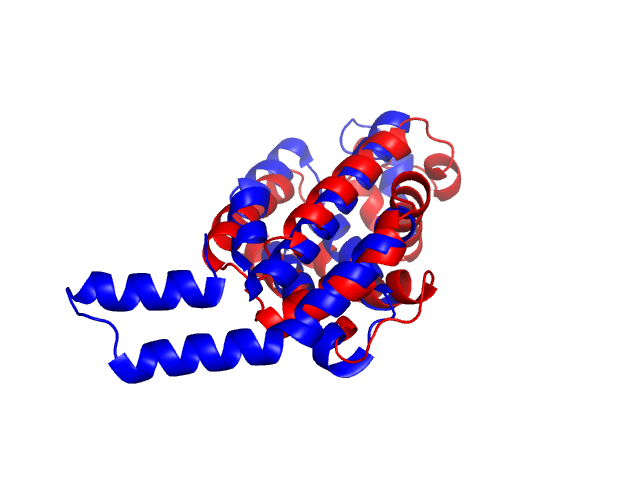

In [5]:
from IPython.display import Image
Image("sup_all_atm.png")

-----

Enjoy!!!